## XGB1 (unscaled)

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import datetime as dt
seed_value= 12321 
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
# import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
# import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)
# 5. For layers that introduce randomness like dropout, make sure to set seed values 
# model.add(Dropout(0.25, seed=seed_value))
#6 Configure a new global `tensorflow` session
# from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

In [4]:

data_raw = pd.read_csv('/Users/<your user name>/<your file path>.csv')
data_curr = data_raw
data_curr['real'] = data_curr['Close']
data_curr['Date'] = pd.to_datetime(data_curr['Date'], errors = 'raise')
data_curr.set_index('Date',inplace = True)
data_curr

,Open,High,Low,Close,Volume,QuoteVol,real
Date,,,,,,,
2017-08-17 00:00:00,4261.48,4349.99,4261.32,4349.99,82.088865,3.531943e+05,4349.99
2017-08-17 04:00:00,4333.32,4485.39,4333.32,4427.30,63.619882,2.825012e+05,4427.30
2017-08-17 08:00:00,4436.06,4485.39,4333.42,4352.34,174.562001,7.742388e+05,4352.34
2017-08-17 12:00:00,4352.33,4354.84,4200.74,4325.23,225.109716,9.652911e+05,4325.23
2017-08-17 16:00:00,4307.56,4369.69,4258.56,4285.08,249.769913,1.079545e+06,4285.08
...,...,...,...,...,...,...,...
2022-10-08 04:00:00,19500.64,19548.00,19450.00,19534.21,15185.865470,2.961666e+08,19534.21
2022-10-08 08:00:00,19534.21,19543.23,19415.00,19487.88,17822.549050,3.473301e+08,19487.88
2022-10-08 12:00:00,19487.88,19535.91,19438.99,19468.03,13246.845790,2.581775e+08,19468.03


In [5]:

for i in [j for j in data_curr.columns][:-1]:
    data_curr[str(i)] = data_curr[str(i)].shift(1)
data_curr = data_curr.dropna()
data_curr


,Open,High,Low,Close,Volume,QuoteVol,real
Date,,,,,,,
2017-08-17 04:00:00,4261.48,4349.99,4261.32,4349.99,82.088865,3.531943e+05,4427.30
2017-08-17 08:00:00,4333.32,4485.39,4333.32,4427.30,63.619882,2.825012e+05,4352.34
2017-08-17 12:00:00,4436.06,4485.39,4333.42,4352.34,174.562001,7.742388e+05,4325.23
2017-08-17 16:00:00,4352.33,4354.84,4200.74,4325.23,225.109716,9.652911e+05,4285.08
2017-08-17 20:00:00,4307.56,4369.69,4258.56,4285.08,249.769913,1.079545e+06,4292.39
...,...,...,...,...,...,...,...
2022-10-08 04:00:00,19504.78,19544.00,19415.60,19499.94,16821.428120,3.278417e+08,19534.21
2022-10-08 08:00:00,19500.64,19548.00,19450.00,19534.21,15185.865470,2.961666e+08,19487.88
2022-10-08 12:00:00,19534.21,19543.23,19415.00,19487.88,17822.549050,3.473301e+08,19468.03


In [6]:
X_data = data_curr.iloc[:,:-1]
y_data = data_curr.iloc[:,-1]
print(X_data,'\n \n', y_data)

                         Open      High       Low     Close        Volume  \
Date                                                                        
2017-08-17 04:00:00   4261.48   4349.99   4261.32   4349.99     82.088865   
2017-08-17 08:00:00   4333.32   4485.39   4333.32   4427.30     63.619882   
2017-08-17 12:00:00   4436.06   4485.39   4333.42   4352.34    174.562001   
2017-08-17 16:00:00   4352.33   4354.84   4200.74   4325.23    225.109716   
2017-08-17 20:00:00   4307.56   4369.69   4258.56   4285.08    249.769913   
...                       ...       ...       ...       ...           ...   
2022-10-08 04:00:00  19504.78  19544.00  19415.60  19499.94  16821.428120   
2022-10-08 08:00:00  19500.64  19548.00  19450.00  19534.21  15185.865470   
2022-10-08 12:00:00  19534.21  19543.23  19415.00  19487.88  17822.549050   
2022-10-08 16:00:00  19487.88  19535.91  19438.99  19468.03  13246.845790   
2022-10-08 20:00:00  19467.49  19480.00  19237.14  19417.96  22816.370520   

In [7]:
start_test = dt.datetime.strptime('2022-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end_test = dt.datetime.strptime('2022-10-09 00:00:00', '%Y-%m-%d %H:%M:%S')
interval_train = (data_curr.index<start_test)
interval_test = (data_curr.index >= start_test) & (data_curr.index <= end_test)
X_train_sin = X_data.loc[interval_train].copy()
y_train_sin = y_data.loc[interval_train].copy()

X_test_sin = X_train_sin.iloc[-59:,:].append(X_data.loc[interval_test].copy())
y_test_sin = y_data.loc[interval_test].copy()
X_test_sin

/var/folders/20/dj9grp4x2qb9l4x0fynxbrvm0000gn/T/ipykernel_31907/779789478.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test_sin = X_train_sin.iloc[-59:,:].append(X_data.loc[interval_test].copy())


,Open,High,Low,Close,Volume,QuoteVol
Date,,,,,,
2021-12-22 07:00:00,49206.43,49535.00,48830.29,48981.99,4953.22659,2.434293e+08
2021-12-22 11:00:00,48981.98,49123.62,48421.87,48879.28,5713.52645,2.783424e+08
2021-12-22 15:00:00,48879.28,49245.81,48506.01,48931.99,3946.36838,1.927947e+08
2021-12-22 19:00:00,48931.99,49144.99,48555.00,48588.16,4101.15369,2.005503e+08
2021-12-22 23:00:00,48588.17,48731.71,47920.42,48524.11,5364.13846,2.594123e+08
...,...,...,...,...,...,...
2022-10-08 04:00:00,19504.78,19544.00,19415.60,19499.94,16821.42812,3.278417e+08
2022-10-08 08:00:00,19500.64,19548.00,19450.00,19534.21,15185.86547,2.961666e+08
2022-10-08 12:00:00,19534.21,19543.23,19415.00,19487.88,17822.54905,3.473301e+08


In [51]:
X_train = [] 
y_train = []
X_test = []
y_test = []

for i in range(60, X_train_sin.shape[0]):
    X_train.append(X_train_sin.iloc[i-60:i,:])
    y_train.append(y_train_sin.iloc[i-1])
    
for i in range(len(y_test_sin)):
    X_test.append(X_test_sin.iloc[i:i+60,:])
    y_test.append(y_test_sin.iloc[i])
    

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9512, 60, 6) (9512,) (1685, 60, 6) (1685,)


## XGB2(scaled)

Important Points to Remember:

There are some algorithms like Decision Tree and Ensemble Techniques (like AdaBoost and XGBoost) that do not require scaling because splitting in these cases are based on the values. It is important to perform feature scaling post splitting the data into training and testing.

In [ ]:
##scaler
# scaler = MinMaxScaler()
# X_train3 = scaler.fit_transform(X_train.reshape(9512,300))
# y_train3 = scaler.fit_transform(y_train.reshape(9512,1))
# X_test3 = scaler.fit_transform(X_test.reshape(1685,300))
# y_test3 = scaler.fit_transform(y_test.reshape(1685,1))

# con_train = np.column_stack((X_train.reshape(9512,360),y_train.reshape(9512,1)))
# con_test = np.column_stack((X_test.reshape(1685,360),y_test.reshape(1685,1)))
# print(con_train.shape)
# scaler = MinMaxScaler()
# scaler.fit(con_train)
# print(con_train.shape)


In [63]:
X_train3 = scaler.transform(con_train)[:,:-1]
y_train3 = scaler.transform(con_train)[:,-1]
scaler2 = MinMaxScaler()
scaler2.fit(con_test)
X_test3 = scaler.transform(con_test)[:,:-1]
y_test3 = scaler.transform(con_test)[:,-1]

In [87]:
print(X_train3.shape, y_train3.shape, X_test.shape,y_test.shape)

(9512, 360) (9512,) (1685, 60, 6) (1685,)


In [ ]:
# X_train3

In [46]:
# https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
 
xgbr3 = xgb.XGBRegressor(verbosity=0)
print(xgbr3)

xgbr3.fit(X_train3, y_train3)
 
score3 = xgbr3.score(X_train3, y_train3)   
print("Training score: ", score3) 
 
# - cross validataion 
scores3 = cross_val_score(xgbr3, X_train3, y_train3, cv=5)
print("Mean cross-validation score: %.2f" % scores3.mean())
kfold = KFold(n_splits=10, shuffle=True)
# kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores3 = cross_val_score(xgbr3, X_train3, y_train3, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores3.mean())
 



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
Training score:  0.9999638813838263
Mean cross-validation score: 0.92
K-fold CV average score: 1.00
MSE: 0.00
RMSE: 0.04


In [108]:
ypred3 = xgbr3.predict(X_test3)
mse3 = mean_squared_error(y_test3, ypred3)
print("MSE: %.2f" % mse3)
print("RMSE: %.2f" % (mse3**(1/2.0)))

MSE: 0.00
RMSE: 0.04


In [109]:
# ypred3, y_test3

con_test3 = np.column_stack((X_test3.reshape(1685,360),ypred3.reshape(1685,1)))
ypred3_final = scaler.inverse_transform(con_test3)
ypred3_final = ypred3_final[:,-1]

In [164]:
# y_test3

array([[0.95993768],
       [0.97533381],
       [0.97903889],
       ...,
       [0.04685486],
       [0.04517965],
       [0.0434606 ]])

In [110]:
ypred3_final

array([47004.28542155, 47515.4293499 , 47157.85567439, ...,
       23265.54402047, 23359.06268817, 22312.57636812])

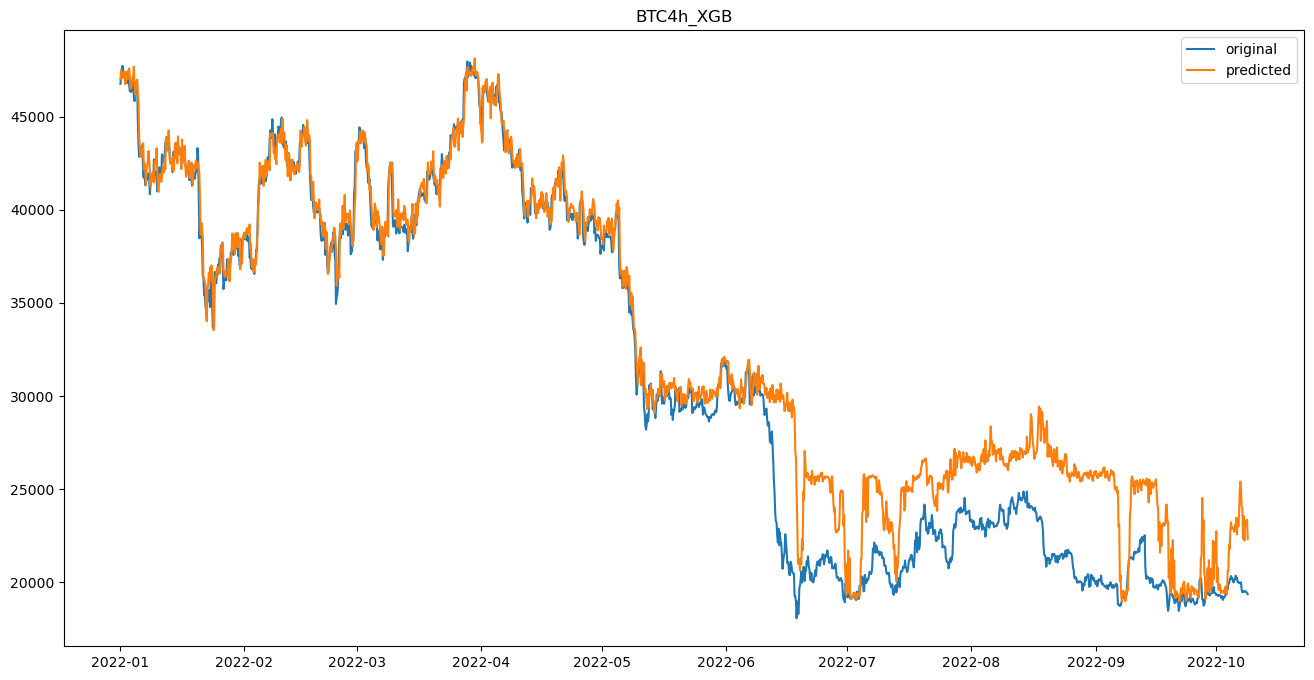

In [111]:
plt.rcParams["figure.figsize"] = (16,8)
plt.plot(y_test_sin.index, y_test, label="original") #color="blue", 
plt.plot(y_test_sin.index, ypred3_final, label="predicted")# lw=0.8, color="red", scatter has ,'s',
plt.title('BTC4h_XGB')
plt.legend()
plt.show()

## LSTM 2 (scaled)

In [69]:
X_train4 = X_train3.reshape(9512,60,6)
y_train4 = y_train3.flatten()
X_test4 = X_test3.reshape(1685,60,6)
y_test4 = y_test3.flatten()

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import LSTM, Dropout
import random
# define model
# Set a seed value
seed_value= 12321 
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
# import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
# import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# 5. For layers that introduce randomness like dropout, make sure to set seed values 
# model.add(Dropout(0.25, seed=seed_value))
#6 Configure a new global `tensorflow` session
# from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)



model4 = Sequential()
model4.add(LSTM(units = 50, return_sequences = True, input_shape = (60, 6)))
# model.add(Dropout(0.2, seed=seed_value)) 
# model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
# # model.add(Dropout(0.3, seed=seed_value)) 
# model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.2, seed=seed_value)) 
model4.add(LSTM(units = 120))
# model.add(Dropout(0.3, seed=seed_value)) 
model4.add(Dense(units =1))
model4.summary()
#old one
# model = Sequential([layers.Input(((df.shape[1]-1), 1)),
#                     layers.LSTM(64),
#                     layers.Dense(32, activation='relu'),
#                     layers.Dense(32, activation='relu'),
#                     layers.Dense(1)])
from keras import optimizers


# model.compile(loss='mse', 
#               optimizer=Adam(learning_rate=0.001),
#               metrics=['mean_absolute_error'])
#old one
# model.fit(scaled_train, y_train, validation_data=(scaled_val, y_val), epochs=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            11400     
                                                                 
 lstm_5 (LSTM)               (None, 120)               82080     
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 93,601
Trainable params: 93,601
Non-trainable params: 0
_________________________________________________________________


In [91]:
model4.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_absolute_error')
history4= model4.fit(X_train4, y_train4, epochs = 20,  validation_split=0.1)

Epoch 1/20
268/268 [==============================] - 12s 41ms/step - loss: 0.0106 - val_loss: 0.0175
Epoch 2/20
268/268 [==============================] - 11s 41ms/step - loss: 0.0063 - val_loss: 0.0148
Epoch 3/20
268/268 [==============================] - 11s 41ms/step - loss: 0.0055 - val_loss: 0.0129
Epoch 4/20
268/268 [==============================] - 11s 40ms/step - loss: 0.0050 - val_loss: 0.0111
Epoch 5/20
268/268 [==============================] - 11s 41ms/step - loss: 0.0047 - val_loss: 0.0143
Epoch 6/20
268/268 [==============================] - 11s 40ms/step - loss: 0.0040 - val_loss: 0.0122
Epoch 7/20
268/268 [==============================] - 11s 40ms/step - loss: 0.0041 - val_loss: 0.0087
Epoch 8/20
268/268 [==============================] - 11s 39ms/step - loss: 0.0040 - val_loss: 0.0088
Epoch 9/20
268/268 [==============================] - 11s 40ms/step - loss: 0.0037 - val_loss: 0.0099
Epoch 10/20
268/268 [==============================] - 11s 41ms/step - loss: 0.004

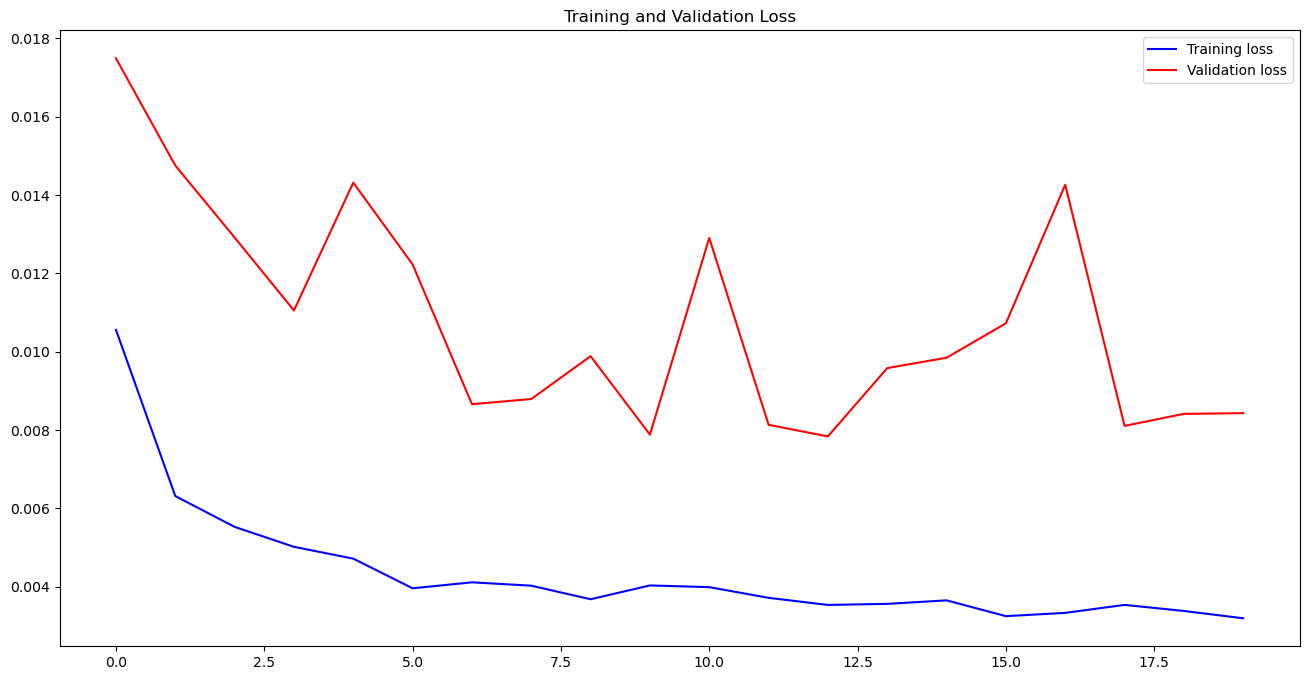

In [92]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [75]:
ypred4 = model4.predict(X_test4)

53/53 [==============================] - 1s 10ms/step


In [88]:
ypred4.shape

(1685, 1)

In [89]:
factor4 = scaler.scale_
factor4.shape

(361,)

In [96]:
scale4 = 1/factor4
con_test4 = np.column_stack((X_test4.reshape(1685,360),ypred4.reshape(1685,1)))
ypred4_final = scaler.inverse_transform(con_test4)
ypred4_final = ypred4_final[:,-1]

In [98]:
ypred4_final.shape

(1685,)

In [100]:
mse4 = mean_squared_error(np.array(y_test_sin), ypred4_final)
print("MSE: %.2f" % mse4)
print("RMSE: %.2f" % (mse4**(1/2.0)))

MSE: 273378.02
RMSE: 522.86


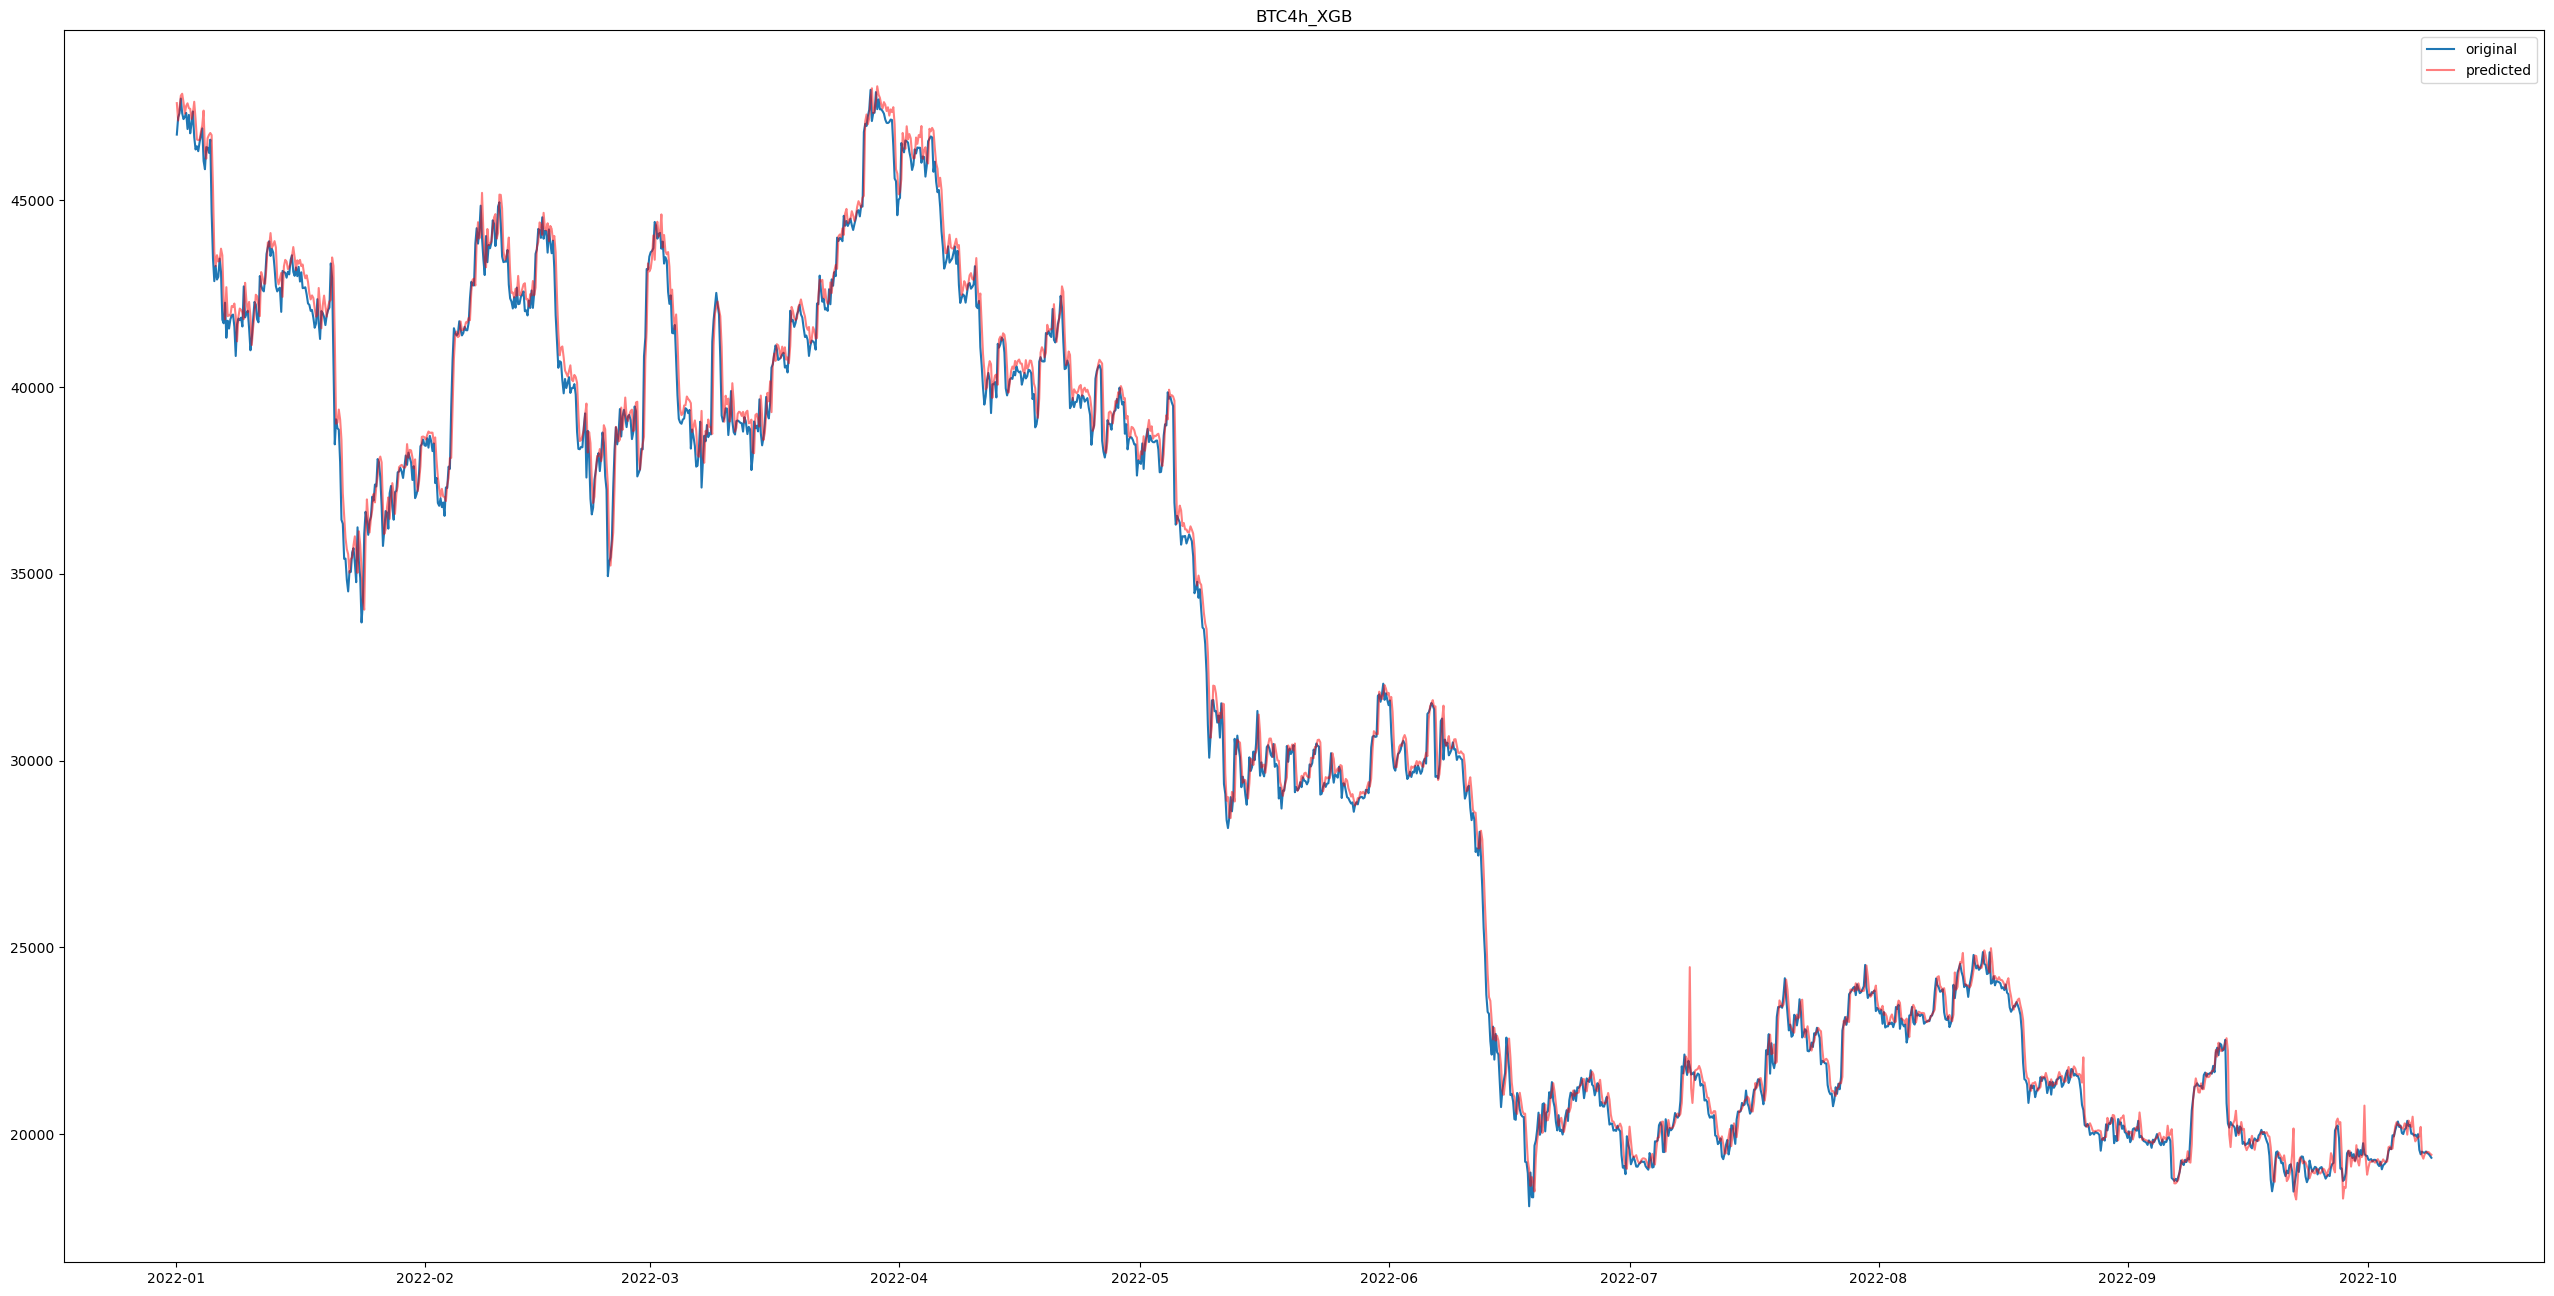

In [104]:
plt.rcParams["figure.figsize"] = (32,16)
plt.plot(y_test_sin.index,np.array(y_test_sin), label="original") #color="blue", 
plt.plot(y_test_sin.index, ypred4_final, label="predicted", color='r', alpha = 0.5)# lw=0.8, color="red", scatter has ,'s',
plt.title('BTC4h_XGB')
plt.legend()
# plt.savefig('btc_pred_极端行情_lstm_scaled.pdf')
plt.show()